## Import Required Libraries
Import essential libraries for data processing, visualization, and machine learning.

In [1]:
# Cell 1: Import libraries & basic settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and Preview Raw Dataset
Load the exoplanet habitability dataset from CSV and display the first 10 rows.

In [3]:
# Cell 2: Preview dataset
df_raw = pd.read_csv("../data/raw/Exopl-habit.csv")
df_raw.head(10)

,Planet_name,Orbit_period,Semi_major_axis,Eccentricity,Mass (EU),Radius (EU),Density,Eqilibrium_temp,Insolation_flux,Distance,Effective_temp,Surface_Stellar_gravity,Stellar_luminosity,Stellar_mass,Stellar_radius,Habitable
0,HAT-P-65 b,2.605455,0.03951,0.304,167.49641,21.185,0.096,1930.0,NaN,841.00,5835.0,3.98,0.555,1.21,1.86,0
1,Kepler-83 b,9.770000,0.07295,NaN,42.10000,2.830,10.200,460.0,15.41,365.00,4648.0,4.72,-1.026,0.58,0.59,0
2,HD 77338 b,5.736100,0.06000,0.090,15.90000,4.120,1.250,NaN,NaN,46.00,5341.0,4.60,-0.150,1.37,0.97,0
3,Kepler-535 b,4.903322,NaN,NaN,6.17000,2.360,2.580,NaN,601.89,678.00,6123.0,4.30,0.309,1.18,1.27,0
4,Kepler-1519 b,240.798940,NaN,NaN,39.60000,7.060,0.618,NaN,3.94,858.00,5644.0,4.50,0.322,0.94,0.91,0
5,Kepler-280 b,2.139542,0.03200,NaN,2.70000,1.450,4.870,NaN,821.89,751.00,5744.0,4.54,-0.091,0.96,0.89,0
6,K2-200 b,2.849883,NaN,NaN,2.43000,1.364,5.260,NaN,NaN,185.09,5233.0,4.71,-0.443,0.86,0.79,0
7,Kepler-194 d,52.814973,0.27500,NaN,6.35000,2.400,2.520,NaN,12.86,1218.00,6089.0,4.42,0.022,1.09,1.02,0
8,Kepler-1018 b,49.101351,NaN,NaN,7.18000,2.580,2.300,NaN,12.10,894.00,5518.0,4.52,-0.086,0.91,0.88,0
9,MOA-2010-BLG-353L b,NaN,1.72000,NaN,85.81410,11.100,0.345,NaN,NaN,6430.00,NaN,NaN,NaN,0.18,NaN,0


## Check Dataset Dimensions
Verify the shape (rows and columns) of the raw dataset.

In [4]:
## Check Raw Dataset Shape (Rows & Columns)
print("✅ Raw Dataset Shape:", df_raw.shape)



✅ Raw Dataset Shape: (3918, 16)


## Analyze Missing Values
Generate a report of null values and their percentages for each column.

In [6]:
## Missing Value Analysis – Tabular Report
null_counts = df_raw.isna().sum()
null_percent = (df_raw.isna().sum() / len(df_raw)) * 100

null_report = pd.DataFrame({
    "Null_Count": null_counts,
    "Null_Percentage": null_percent
}).sort_values(by="Null_Percentage", ascending=False)

null_report


,Null_Count,Null_Percentage
Eqilibrium_temp,3085,78.739153
Eccentricity,2476,63.195508
Insolation_flux,1523,38.871873
Semi_major_axis,1479,37.748851
Surface_Stellar_gravity,210,5.359877
Stellar_radius,110,2.807555
Stellar_luminosity,101,2.577846
Orbit_period,100,2.552323
Density,99,2.526799
Effective_temp,86,2.194997


## Visualize Missing Values
Create a bar chart showing the distribution of null values across features.

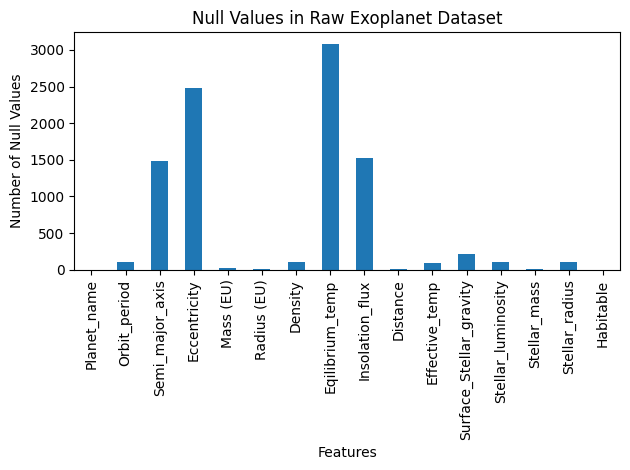

In [7]:
## Remove Unnecessary and High-Null Columns

plt.figure()
null_counts.plot(kind='bar')
plt.title("Null Values in Raw Exoplanet Dataset")
plt.xlabel("Features")
plt.ylabel("Number of Null Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



## Drop Unnecessary Columns
Remove columns with high null percentages or unnecessary data (e.g., Planet_name).

## Final Missing Value Imputation – Complete Dataset

In [9]:
cols_to_drop = ["Planet_name"]

df_raw.drop(columns=cols_to_drop, inplace=True, errors="ignore")

print("Dropped Columns:", cols_to_drop)
print(df_raw.shape)


Dropped Columns: ['Planet_name']
(3918, 15)


## Separate Features and Target
Split the dataset into features (X) and target variable (y for habitability).

In [10]:
X = df_raw.drop(columns=["Habitable"])
y = df_raw["Habitable"]

X.shape, y.shape


((3918, 14), (3918,))

## Perform Median Imputation
Handle missing values using median imputation strategy from scikit-learn.

In [11]:
from sklearn.impute import SimpleImputer

print("🧹 Performing Median Imputation...")

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Imputation Done!")
X_imputed.isnull().sum().sum()  # Should be 0



🧹 Performing Median Imputation...
Imputation Done!


np.int64(0)

## Verify Imputation Results
Check that all missing values have been successfully imputed.

In [12]:
print("🔍 Missing Values After Imputation:")
X_imputed.isnull().sum().sort_values(ascending=False)


🔍 Missing Values After Imputation:


Orbit_period               0
Semi_major_axis            0
Eccentricity               0
Mass (EU)                  0
Radius (EU)                0
Density                    0
Eqilibrium_temp            0
Insolation_flux            0
Distance                   0
Effective_temp             0
Surface_Stellar_gravity    0
Stellar_luminosity         0
Stellar_mass               0
Stellar_radius             0
dtype: int64

## Standardize Features
Apply StandardScaler to normalize all feature values to zero mean and unit variance.

In [14]:
from sklearn.preprocessing import StandardScaler

print("📏 Scaling Features...")

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print("Scaling Done!")
X_scaled.head(10)



📏 Scaling Features...
Scaling Done!


,Orbit_period,Semi_major_axis,Eccentricity,Mass (EU),Radius (EU),Density,Eqilibrium_temp,Insolation_flux,Distance,Effective_temp,Surface_Stellar_gravity,Stellar_luminosity,Stellar_mass,Stellar_radius
0,-0.019540,-0.062010,1.566689,-0.070692,2.897037,-0.178036,3.299334,-0.166817,0.272585,0.208679,-0.907775,0.889508,0.352965,0.085079
1,-0.019478,-0.061476,-0.206742,-0.099321,-0.507729,0.244580,-2.125666,-0.236565,-0.332668,-0.510020,0.869067,-1.379730,-0.701331,-0.260389
2,-0.019513,-0.061683,-0.236229,-0.105302,-0.268440,-0.129769,-0.055309,-0.166817,-0.738288,-0.090426,0.580931,-0.122391,0.620723,-0.157021
3,-0.019520,-0.060884,-0.206742,-0.107524,-0.594912,-0.074139,-0.055309,0.340225,0.065324,0.383056,-0.139411,0.536420,0.302761,-0.075414
4,-0.017504,-0.060884,-0.206742,-0.099892,0.276916,-0.156203,-0.055309,-0.247845,0.294201,0.093033,0.340817,0.555079,-0.098876,-0.173342
5,-0.019544,-0.062130,-0.206742,-0.108316,-0.763713,0.021644,-0.055309,0.556589,0.158146,0.153581,0.436863,-0.037707,-0.065406,-0.178783
6,-0.019538,-0.060884,-0.206742,-0.108378,-0.779666,0.037956,-0.055309,-0.166817,-0.561430,-0.155817,0.845056,-0.542939,-0.232755,-0.205985
7,-0.019111,-0.058249,-0.206742,-0.107483,-0.587492,-0.076649,-0.055309,-0.239073,0.751955,0.362470,0.148726,0.124484,0.152147,-0.143420
8,-0.019142,-0.060884,-0.206742,-0.107293,-0.554103,-0.085851,-0.055309,-0.239820,0.339976,0.016743,0.388840,-0.030531,-0.149080,-0.181503
9,-0.019460,-0.035173,-0.206742,-0.089341,1.026317,-0.167622,-0.055309,-0.166817,7.379213,0.063668,0.196749,0.021141,-1.370725,-0.154301


## Create Final Cleaned Dataset
Combine scaled features with the target variable to create the final ML-ready dataset.

In [19]:
df_cleaned = X_scaled.copy()
df_cleaned["Habitable"] = y.values

print("✅ Cleaned Dataset Shape:", df_cleaned.shape)
df_cleaned.head()

✅ Cleaned Dataset Shape: (3918, 15)


,Orbit_period,Semi_major_axis,Eccentricity,Mass (EU),Radius (EU),Density,Eqilibrium_temp,Insolation_flux,Distance,Effective_temp,Surface_Stellar_gravity,Stellar_luminosity,Stellar_mass,Stellar_radius,Habitable
0,-0.019540,-0.062010,1.566689,-0.070692,2.897037,-0.178036,3.299334,-0.166817,0.272585,0.208679,-0.907775,0.889508,0.352965,0.085079,0
1,-0.019478,-0.061476,-0.206742,-0.099321,-0.507729,0.244580,-2.125666,-0.236565,-0.332668,-0.510020,0.869067,-1.379730,-0.701331,-0.260389,0
2,-0.019513,-0.061683,-0.236229,-0.105302,-0.268440,-0.129769,-0.055309,-0.166817,-0.738288,-0.090426,0.580931,-0.122391,0.620723,-0.157021,0
3,-0.019520,-0.060884,-0.206742,-0.107524,-0.594912,-0.074139,-0.055309,0.340225,0.065324,0.383056,-0.139411,0.536420,0.302761,-0.075414,0
4,-0.017504,-0.060884,-0.206742,-0.099892,0.276916,-0.156203,-0.055309,-0.247845,0.294201,0.093033,0.340817,0.555079,-0.098876,-0.173342,0


## Detect Outliers with Boxplots
Visualize boxplots for all features to identify potential outliers.

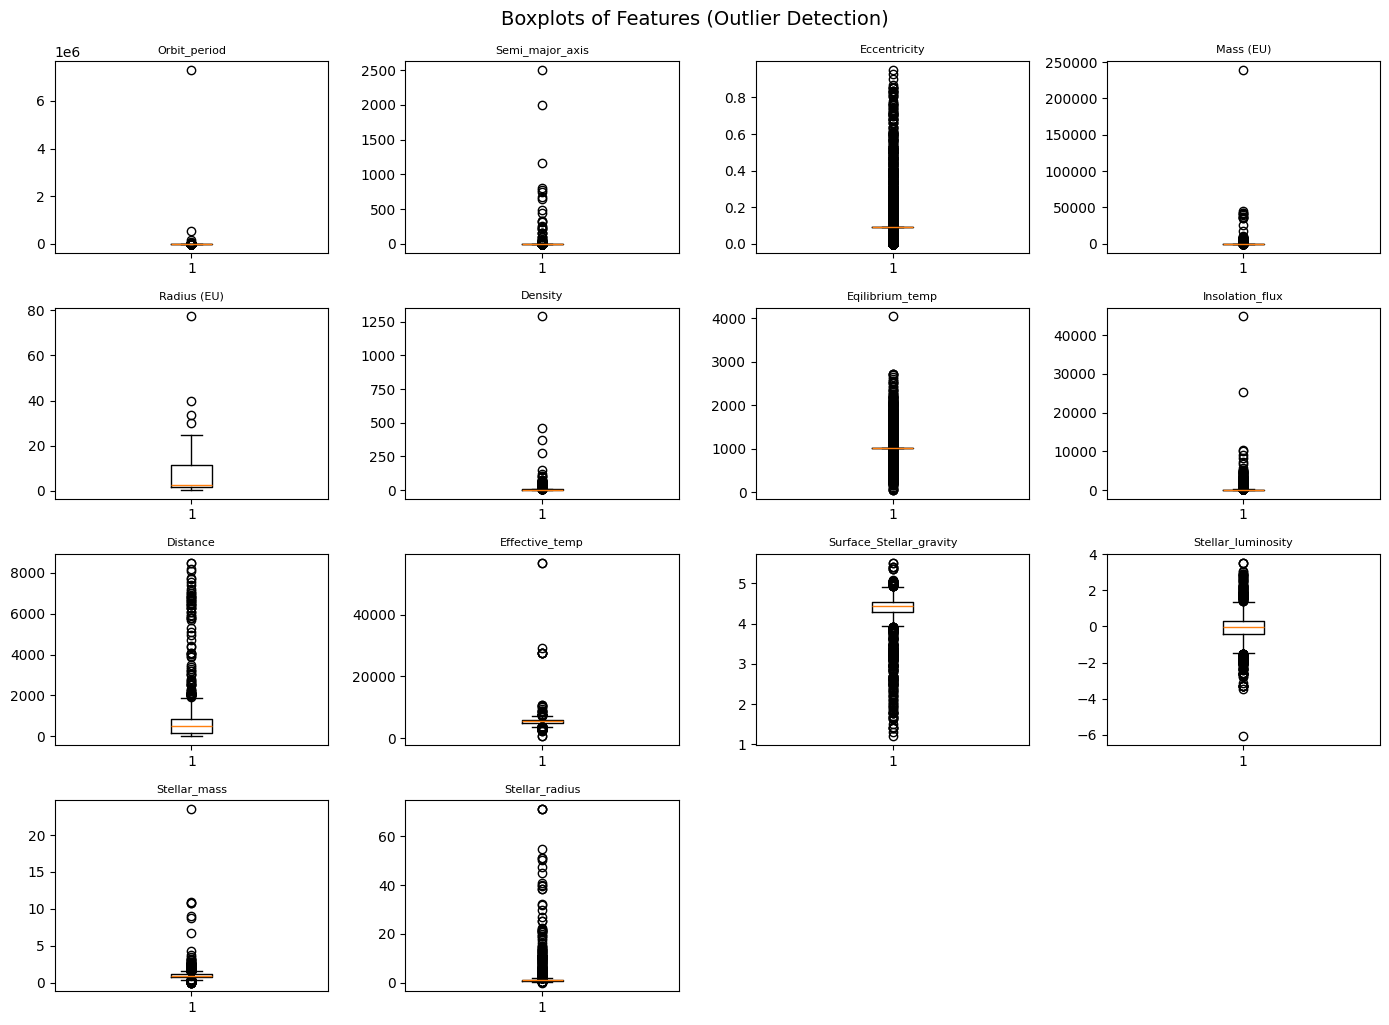

In [20]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i, col in enumerate(X_imputed.columns):
    plt.subplot(4, 4, i+1)
    plt.boxplot(X_imputed[col], vert=True)
    plt.title(col, fontsize=8)
    plt.tight_layout()

plt.suptitle("Boxplots of Features (Outlier Detection)", y=1.02, fontsize=14)
plt.show()


## Calculate Feature Correlation Matrix
Compute pairwise correlations between all features to identify multicollinearity.

feature relationship

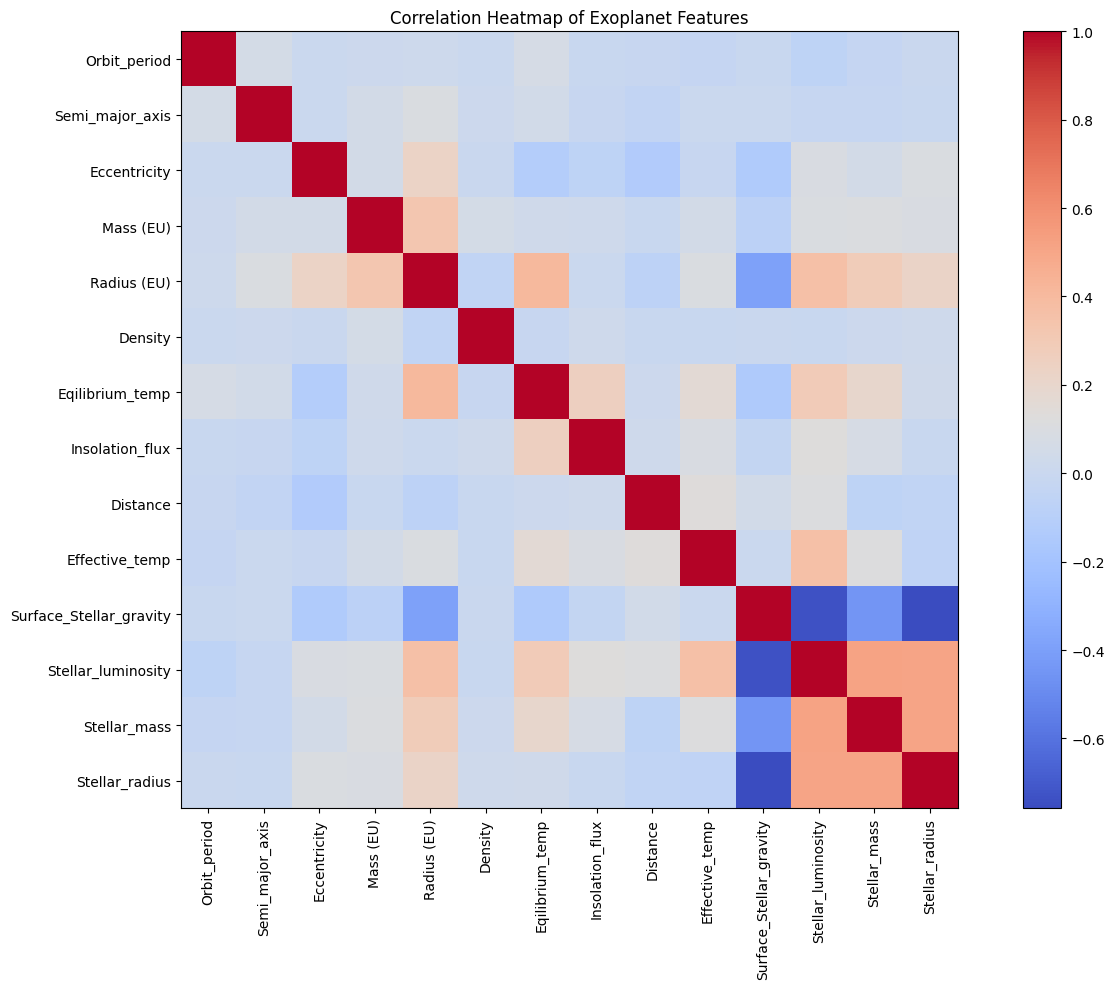

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation only for features (exclude Habitable)
corr_matrix = X_imputed.corr()

corr_matrix


plt.figure(figsize=(14, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap of Exoplanet Features")
plt.tight_layout()
plt.show()



## Feature-Target Correlation Analysis
Show correlations of all features with the target variable (habitability).

In [27]:
# Show correlations sorted with respect to the target
target_corr = X_imputed.corrwith(y).sort_values(ascending=False)
target_corr


Surface_Stellar_gravity    0.069954
Eccentricity               0.005274
Density                   -0.000069
Orbit_period              -0.002103
Semi_major_axis           -0.006538
Mass (EU)                 -0.012099
Insolation_flux           -0.026657
Stellar_radius            -0.030135
Distance                  -0.054500
Radius (EU)               -0.078138
Stellar_mass              -0.087613
Effective_temp            -0.097253
Eqilibrium_temp           -0.173225
Stellar_luminosity        -0.204182
dtype: float64

## Pairwise Feature Relationships
Create scatterplots showing relationships between selected feature pairs.

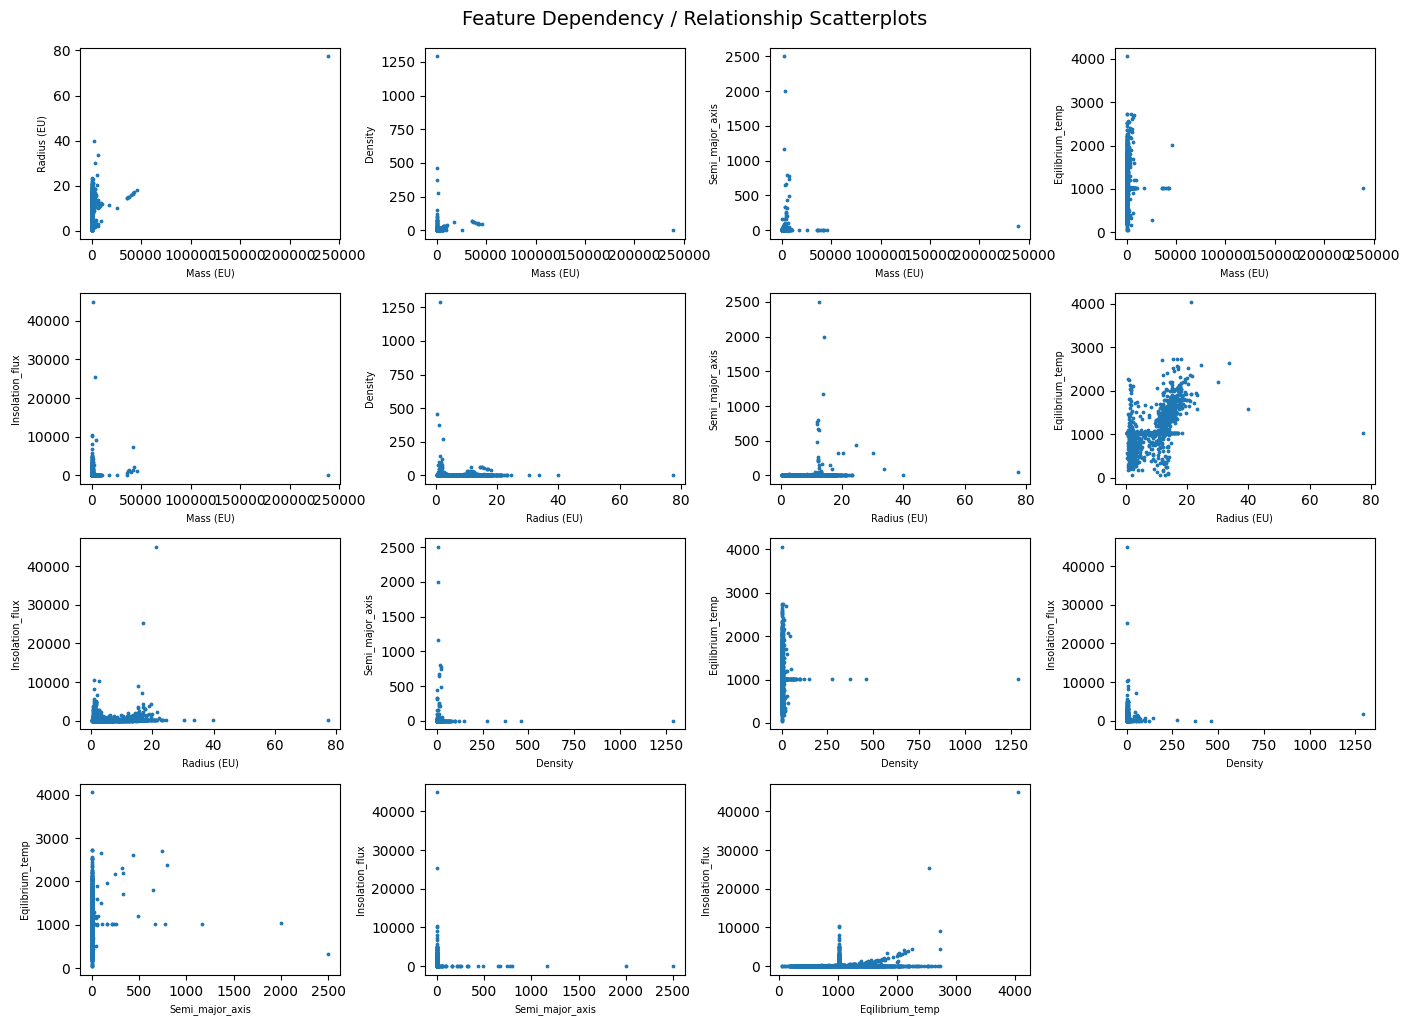

In [29]:
import matplotlib.pyplot as plt

selected_features = ["Mass (EU)", "Radius (EU)", "Density", 
                     "Semi_major_axis", "Eqilibrium_temp", "Insolation_flux"]

plt.figure(figsize=(14, 10))
plot_index = 1

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        plt.subplot(4, 4, plot_index)
        plt.scatter(X_imputed[selected_features[i]], 
                    X_imputed[selected_features[j]], s=3)
        plt.xlabel(selected_features[i], fontsize=7)
        plt.ylabel(selected_features[j], fontsize=7)
        plot_index += 1
        plt.tight_layout()

plt.suptitle("Feature Dependency / Relationship Scatterplots", y=1.02, fontsize=14)
plt.show()


## Log-Scaled Feature Dependencies
Visualize feature relationships using log scale to better reveal patterns in wide-range data.

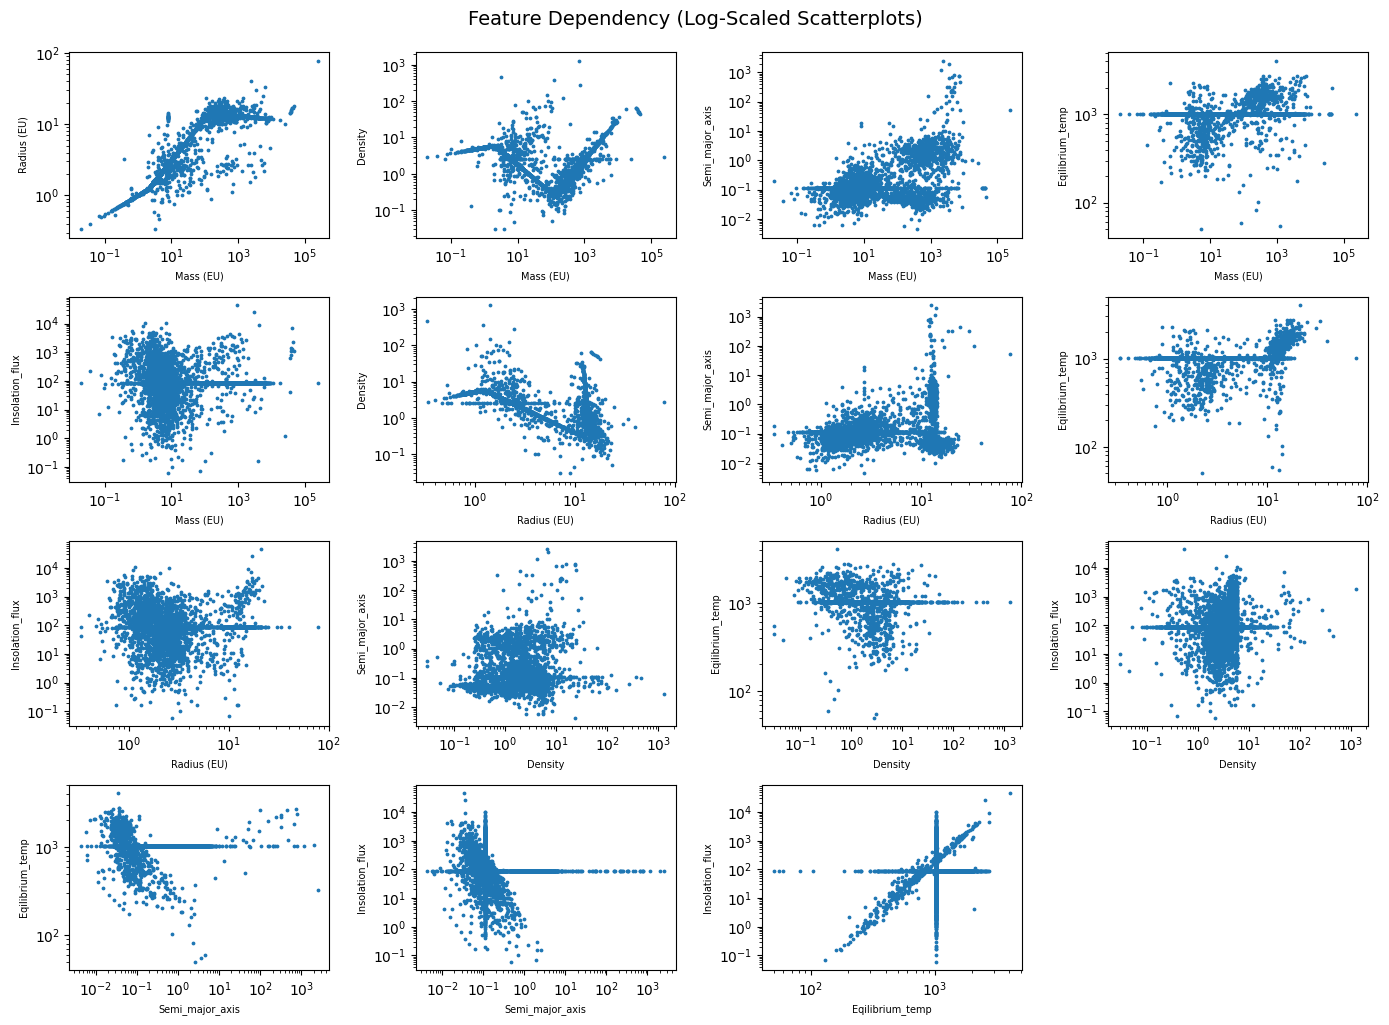

In [30]:
import matplotlib.pyplot as plt
import numpy as np

selected_features = ["Mass (EU)", "Radius (EU)", "Density", 
                     "Semi_major_axis", "Eqilibrium_temp", "Insolation_flux"]

plt.figure(figsize=(14, 10))
plot_index = 1

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):
        plt.subplot(4, 4, plot_index)
        x = X_imputed[selected_features[i]]
        y = X_imputed[selected_features[j]]

        plt.scatter(x, y, s=3)

        plt.xscale("log")
        plt.yscale("log")

        plt.xlabel(selected_features[i], fontsize=7)
        plt.ylabel(selected_features[j], fontsize=7)
        plot_index += 1
        plt.tight_layout()

plt.suptitle("Feature Dependency (Log-Scaled Scatterplots)", y=1.02, fontsize=14)
plt.show()
